In [1]:
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np

# plt.rcParams.update(plt.rcParamsDefault)
# plt.style.available


In [2]:
df = pd.read_table("SchaffersDifferential.txt", header=-1)

In [3]:
df.head()

,0
0,"22,0.4045686271079203,0.7258858231097487,2,false"
1,Score: 9.95672535001251
2,Runtime: 1531ms
3,"13,0.8487202340224352,0.49453783693268005,3,false"
4,Score: 9.919935385418393


In [4]:
df.shape

(15000, 1)

In [5]:
score = []
param = []

for i in range(df.shape[0]):
    if df[0][i][:5] == "Score":
        score.append(float(df[0][i][7:]))
    elif df[0][i][:7] != "Runtime":
        param.append(df[0][i].split(","))

score = pd.Series(score)
param = pd.DataFrame(param)
df = pd.concat([score, param], axis=1)
df.head()

,0,0,1,2,3,4
0,9.956725e+00,22,0.4045686271079203,0.7258858231097487,2,false
1,9.919935e+00,13,0.8487202340224352,0.49453783693268005,3,false
2,1.366533e-58,24,0.5181010472734762,1.9049396402017642,2,false
3,9.957331e+00,31,0.5184279148300688,0.46821775246941155,1,false
4,9.761867e+00,21,0.6016127102357518,0.2845352425952281,3,false


In [6]:
score.shape, param.shape, df.shape

((5000L,), (5000, 5), (5000, 6))

In [7]:
df.columns = ['score', 'populationSize', 'crossOverRate', 'differentialRate', 'pertubationSize', 'bestBase']
df['populationSize'] = df.populationSize.astype(float)
df['crossOverRate'] = df.crossOverRate.astype(float)
df['differentialRate'] = df.differentialRate.astype(float)
df["pertubationSize"] = df.pertubationSize.astype(int)

df.head()

,score,populationSize,crossOverRate,differentialRate,pertubationSize,bestBase
0,9.956725e+00,22.0,0.404569,0.725886,2,false
1,9.919935e+00,13.0,0.848720,0.494538,3,false
2,1.366533e-58,24.0,0.518101,1.904940,2,false
3,9.957331e+00,31.0,0.518428,0.468218,1,false
4,9.761867e+00,21.0,0.601613,0.284535,3,false


In [8]:
max(df.score)

10.0

In [9]:
good = df[df.score == 10]

In [10]:
good.shape
good.head()

,score,populationSize,crossOverRate,differentialRate,pertubationSize,bestBase
77,10.0,40.0,0.590375,0.411524,2,false
123,10.0,42.0,0.762779,0.492785,2,false
264,10.0,19.0,0.867167,0.575374,3,false
289,10.0,48.0,0.877555,0.450265,2,false
298,10.0,29.0,0.665069,0.555326,2,false


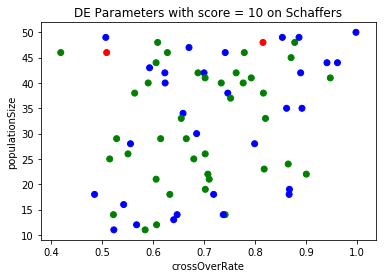

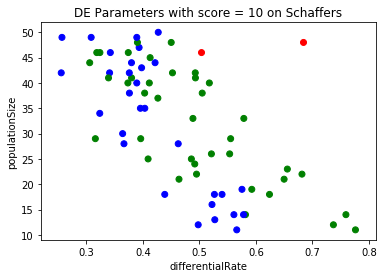

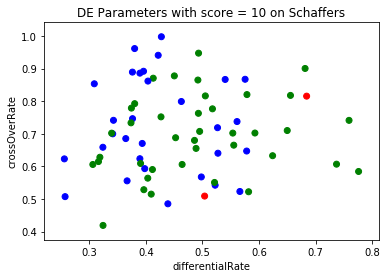

In [11]:
color= ['red' if l == 1 else 'green' if l==2 else 'blue' for l in good.pertubationSize]

for p1 in range(1,4):
    for p2 in range(1,4):
        if p1 > p2:
            plt.figure()
            plt.title("DE Parameters with score = 10 on Schaffers")
            plt.scatter(good[good.columns[p1]], good[good.columns[p2]], c=color)
            plt.xlabel(good.columns[p1])
            plt.ylabel(good.columns[p2])
            plt.savefig("plot"+str(p1)+str(p2)+".png")
            plt.show()

In [12]:
good.pertubationSize.value_counts()

2    39
3    30
1     2
Name: pertubationSize, dtype: int64

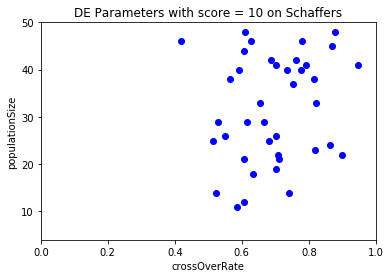

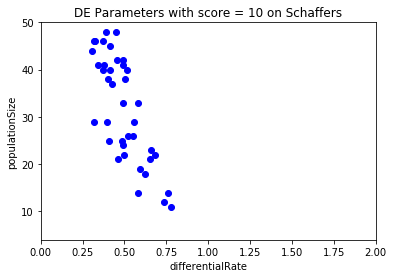

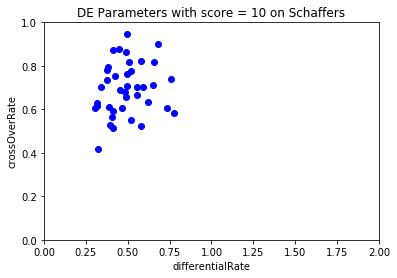

In [13]:
good = good[good.pertubationSize == 2]

for p1 in range(1,4):
    for p2 in range(1,4):
        if p1 > p2:
            plt.figure()
            plt.title("DE Parameters with score = 10 on Schaffers")
            plt.scatter(good[good.columns[p1]], good[good.columns[p2]], c='b')
            plt.xlim(min(df[good.columns[p1]]), max(df[good.columns[p1]]))
            plt.ylim(min(df[good.columns[p2]]), max(df[good.columns[p2]]))
            plt.xlabel(good.columns[p1])
            plt.ylabel(good.columns[p2])
            # plt.savefig("plot2 %i %i.png" %p1 %p2)
            plt.show()

In [14]:
from scipy.interpolate import LSQUnivariateSpline

def interpolate(df, name):

    for par in df.columns[[1,2,3]]:
        df = df.sort_values(by=[par]).reset_index(drop=True)

        x = np.array(df[par].astype(float))
        y = np.array(df.score)
        t = x[[len(df)/5,2*len(df)/5,3*len(df)/5,4*len(df)/5]] ## np.array([10,20,30,40])

        spl = LSQUnivariateSpline(x, y, t)
        ynew = spl(x)

        argmax = df[par][df.score == max(df.score)].values[0]

        plt.figure()
        plt.title("Random Search DE on Schaffers")
        plt.scatter(x,y, c='b')
        plt.plot(x, ynew, 'r')
        plt.xlim(min(x), max(x))
        plt.ylim(0,max(df.score))
        plt.xlabel(par)
        plt.ylabel(name)
        # plt.savefig("%i %s.png" %par %name)
        plt.show()
        print argmax
    

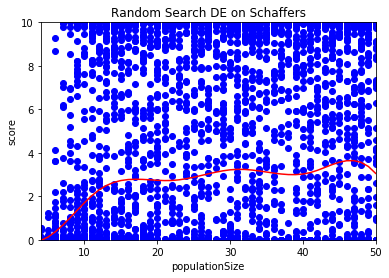

11.0


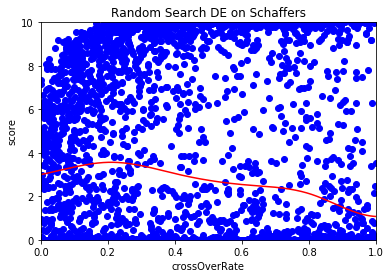

0.418975488712


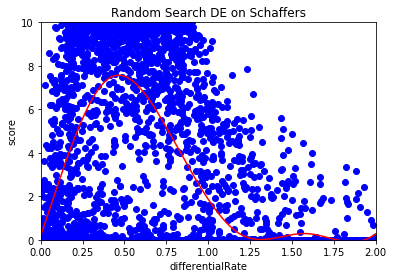

0.255813628005


In [15]:
interpolate(df, "score")

In [16]:
df["score"] = df.score.apply(lambda x: -np.log10(10 - x + 1e-10))

In [17]:
max(df.score)

10.0

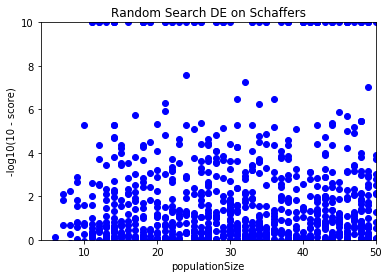

11.0


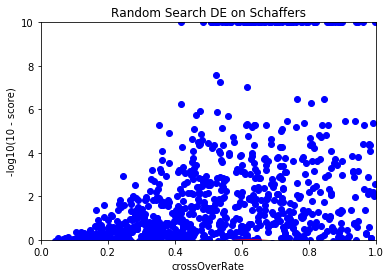

0.418975488712


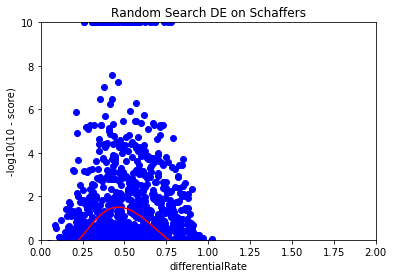

0.255813628005


In [18]:
interpolate(df, "-log10(10 - score)")